<a href="https://colab.research.google.com/github/CheronoK/WEEK-9-IP/blob/master/Cherono_Independent_Project_Week_9_K_Nearest__Neighbour_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color="green">*To start working on this notebook, or any other notebook that we will use in the Moringa Data Science Course, we will need to save our own copy of it. We can do this by clicking File > Save a Copy in Drive. We will then be able to make edits to our own copy of this notebook.*</font>

# K-Nearest Neighbour Classifier

## 1. Defining the Question

### a) Specifying the Data Analytic Question

> This week's project requires us to implement a K-Nearest Neighbour(KNN) classifier on the provided dataset in order to classify what sorts of people were likely to survive the titanic.

### b) Defining the Metric for Success



> The metric for success will be the accuracy score for each model. A model with an accuracy of above 80% will be considered a good model.

> We'll also use a confusion matrix for each of the models to evaluate it's performance. A model with a low number of false negatives and false positives will be considered a good model as this means that most of the positive and negative examples are correctly recognized.



### c) Understanding the context 

RMS Titanic was a British passenger liner operated by the White Star Line that sank in the North Atlantic Ocean in the early morning hours of 15 April 1912, after striking an iceberg during her maiden voyage from Southampton to New York City. 

Of the estimated 2,224 passengers and crew aboard, more than 1,500 died, making the sinking one of modern history's deadliest peacetime commercial marine disasters.

### d) Recording the Experimental Design


The following are the steps taken to implement the solution :
* Define the question, the metric for success, the context, experimental design taken.
* Read and explore the given dataset.
* Define the appropriateness of the available data to answer the given question.
* Find and deal with outliers, anomalies, and missing data within the dataset.
* Perform exploratory analysis recording our observations.
* Build a baseline model to use as a benchmark for our model
* Build a K-Nearest Neighbour Classifier Model using an 80-20 split as train and test respectively
* Repeat the above step twice using 70-30 split and 60-40 split.
* Optimize the model for better performance
* Challenge our solution and give recommendations as to how we could improve the model performance.


### e) Data Relevance

The titanic data frames describe the survival status of individual passengers
on the Titanic. The titanic data frame does not contain information from the crew, but it does contain actual ages of half of the passengers. 

Our dataset is therefore is very relevant in answering the given question.

## 2. Reading the Data

### a.) Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

### b.) Loading the Dataset

In [2]:
#Loading the Data from the source
#Dataset source

#Train Dataset = https://archive.org/download/train5_202002/train%20%285%29.csv
#Test Dataset = https://archive.org/download/test1_202002/test%20%281%29.csv

train = pd.read_csv('https://archive.org/download/train5_202002/train%20%285%29.csv')
test = pd.read_csv('https://archive.org/download/test1_202002/test%20%281%29.csv')



## 3. Checking the Data

In [3]:
#Determining the no. of records in our train dataset
train.shape

(891, 12)

In [4]:
#Determining the no. of records in our test dataset
test.shape

(418, 11)

Our train dataset has 891 entries and 12 columns while the test dataset has 418 entries and 11 columns.

In [5]:
#Previewing the top of our train dataset
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
#Previewing the top of our test dataset
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
#Previewing the bottom of our train dataset
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [8]:
#Previewing the bottom of our test dataset
test.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


From the above preview, we can tell that our datasets are the same i.e. they have the same attributes and where the train data ends is where the test data starts i.e. the 891st entry is the last entry of the train dataset whereas the test set starts at the 892nd entry. However, the test dataset has one less column i.e. it does not contain the dependent variable(the survival of the passengers)

We'll therefore carry analysis and build models using our train dataset and later on use the test dataset to see how well our model performs on unseen data.

In [9]:
#Checking whether each column has an appropriate datatype
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Our train dataset has 2 floats,5 integer features and 5 are objects.

In [10]:
#Checking for unique values in dataset
train.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

The variables with fewer uniques values are categorical with each categorizing the datasets into different categories.

In [11]:
#Checking for null values in our dataset
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Most of the features do not have null values. However, there are null values in the age, cabin and Embarked columns. 

The cabin variable has so many null values, we'll therefore drop this column. 

The Age variable seems like an important feature in predicting the survival of a passenger. We'll therefore fill in the missing values later on.

The Embarked variable also has only 2 null values, we'll drop those missing values as they are few. 

In [12]:
#Checking for duplicated rows
train.duplicated().any()

False

We do not have any duplicated entries in our dataset.

In [13]:
#Checking the columns in the dataset
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [14]:
#Checking for the general information of the dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


> Below is a description of each of the variables in our dataset;
 
* PassengerId: Unique Id of a passenger
* Survived: Survival (0 = No; 1 = Yes)
* pclass: Ticket class (1 = 1st; 2 = 2nd; 3 = 3rd)     
* sex: Sex   
* Name: The name of the passenger  
* Age: Age in years     
* Sibsp: Number of siblings/Spouses aboard the Titanic     
* Parch: Number of parents/Children aboard the Titanic     
* Ticket: Ticket number     
* Fare: Passenger fare (British pound)   
* Cabin: Cabin number     
* Embarked: Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

## 4. External Data Source Validation

The titanic dataset is a very common dataset used by many Data Scientists. 

The principal source of data about Titanic passengers is the Encyclopedia Titanica. The datasets used here were begun by a variety of researchers. One of the original sources is Eaton & Haas (1994) Titanic: Triumph and Tragedy, Patrick Stephens Ltd, which includes a passenger list created by many researchers.

## 5. Tidying the Dataset

### a.) Null values

As had mentioned earlier, we're going to drop the cabin column. In addition to the cabin column, we'll also drop other irrelevant columns that aren't relevant for predicting survival. These columns are the passenger ID, Name of the passenger and the ticket number.

In [15]:
#Dropping irrelevant columns
train.drop(['PassengerId','Name','Ticket','Cabin'], axis=1, inplace=True)
train.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

Now that we've dropped irrelevant columns, we'll go ahead and fill in missing values in age and embarked columns.

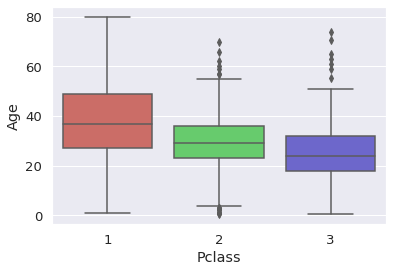

In [16]:
#Looking at how passenger age is related to their class as a passenger on the boat 
#We'll plot a box plot to visualize this relationship
sns.boxplot(x='Pclass', y='Age', data=train, palette='hls')

From the above, we could conclude that the younger a passenger is, the more likely it is for them to be in 3rd class. 
The older a passenger is, the more likely it is for them to be in 1st class.
So there is a loose relationship between these variables.

Therefore we'll write a function that approximates a passengers age, based on their class. 
From the box plot, it looks like the average age of 1st class passengers is about 37, 2nd class passengers is 29, and 3rd class pasengers is 24.

In [18]:
#So let's write a function that finds each null value in the Age variable 
#And for each null,checks the value of the Pclass and assigns an age value according to the average age of passengers in that class.
def age_approx(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [19]:
#We then apply the function and check again for null values
train['Age'] = train[['Age', 'Pclass']].apply(age_approx, axis=1)
train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

Our age variable now does not have null values. Only the Embarked has 2 null values. We'll go ahead and drop the 2 null values as they are very few.

In [20]:
#Dropping the remaining null values
train2 = train.dropna()
train2.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

All null values have been sorted, we therefore have a dataset free of the null values.

We'll do the same to the test dataset as we'll later on use the test dataset to see how well our model performs on unseen data.

In [21]:
#Let's first check the null values in our test dataset
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Our test dataset, just like the train, has plenty of null values in the cabin column and some in the age column and only one null in the fare column.

We'll do the same procedure we conducted on the train set; drop the cabin and other irrelevant columns then fill in missing values of age and drop the null value in the fare column.

In [22]:
#Dropping irrelevant columns
test.drop(['PassengerId','Name','Ticket','Cabin'], axis=1, inplace=True)
test.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')

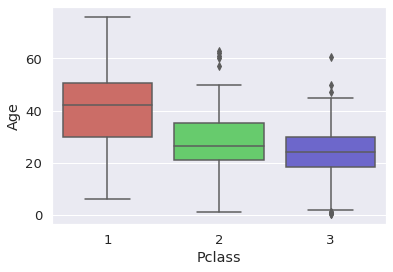

In [23]:
#Looking at how passenger age is related to their class as a passenger on the boat 
#We'll plot a box plot to visualize this relationship
sns.boxplot(x='Pclass', y='Age', data=test, palette='hls')

From the above, we could conclude that the younger a passenger is, the more likely it is for them to be in 3rd class. 
The older a passenger is, the more likely it is for them to be in 1st class. Just like in the train dataset.

Therefore, there is a loose relationship between these variables.

We'll write a function that approximates a passengers age, based on their class. 
From the box plot, it looks like the average age of 1st class passengers is about 42, 2nd class passengers is 27, and 3rd class pasengers is 24.

In [24]:
#So let's write a function that finds each null value in the Age variable 
#And for each null,checks the value of the Pclass and assigns an age value according to the average age of passengers in that class.
def age_approx(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 42
        elif Pclass == 2:
            return 27
        else:
            return 24
    else:
        return Age

In [25]:
#We then apply the function and check again for null values
test['Age'] = train[['Age', 'Pclass']].apply(age_approx, axis=1)
test.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        1
Embarked    0
dtype: int64

Our age variable now does not have null values. Only the Fare has only 1 null value. We'll go ahead and drop the null value as it is only one

In [26]:
#Dropping the remaining null values
test2 = test.dropna()
test2.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

All null values have been sorted, we therefore have a test set free of the null values.

In [27]:
train2.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

### b.) Encoding categorical features

Our dataset has 2 categorical features i.e. the Sex and Embarked which we need to encode them as numerical variables.
We'll do this using the Label Encoder which only works on categorical features.

In [28]:
#Let's check the variables with the object data type as those are the categorical features
train2.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

The sex and Embarked features are the categorical features we need to encode.

In [29]:
#We'll first extract the categorial featuers using boolean mask

#Categorical boolean mask
categorical_feature_mask = train2.dtypes==object
# filter categorical columns using mask and turn it into a list
categorical_cols = train2.columns[categorical_feature_mask].tolist()

In [30]:
#Importing warnings in order to ignore them when printing out the output
import warnings
warnings.filterwarnings("ignore")
#Encoding categorical features using label encoder

#Importing labelencoder
from sklearn.preprocessing import LabelEncoder

#Instantiating labelencoder object
le = LabelEncoder()

#Applying le on categorical feature columns
train2[categorical_cols] = train2[categorical_cols].apply(lambda col: le.fit_transform(col))
train2[categorical_cols].head(10)

,Sex,Embarked
0,1,2
1,0,0
2,0,2
3,0,2
4,1,2
5,1,1
6,1,2
7,1,2
8,0,2
9,0,0


From the above, we could see that the categorical features have been encoded.
The sex column has 0 and 1 numerical values; 0 for female and 1 for male.
The Embarked column as well has 0, 1 and 2 numerical values; 0 for C (Cherbourg), 1 for Q (Queenstown) and 2 for S (Southampton)

In [31]:
#Let's preview the top of our now encoded dataset
train2.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


We now have an encoded dataset.
We'll also encode our test set.

In [32]:
#We'll first extract the categorial featuers using boolean mask

#Categorical boolean mask
categorical_feature_mask = test2.dtypes==object
# filter categorical columns using mask and turn it into a list
categorical_cols = test2.columns[categorical_feature_mask].tolist()

In [33]:
#Importing warnings in order to ignore them when printing out the output
import warnings
warnings.filterwarnings("ignore")
#Encoding categorical features using label encoder

#Importing labelencoder
from sklearn.preprocessing import LabelEncoder

#Instantiating labelencoder object
le = LabelEncoder()

#Applying le on categorical feature columns
test2[categorical_cols] = test2[categorical_cols].apply(lambda col: le.fit_transform(col))
test2[categorical_cols].head(10)

,Sex,Embarked
0,1,1
1,0,2
2,1,1
3,1,2
4,0,2
5,1,2
6,0,1
7,1,2
8,0,0
9,1,2


In [34]:
#Let's preview the top of our now encoded test dataset
test2.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,0,0,7.8292,1
1,3,0,38.0,1,0,7.0000,2
2,2,1,26.0,0,0,9.6875,1
3,3,1,35.0,0,0,8.6625,2
4,3,0,35.0,1,1,12.2875,2


### c.) Outliers

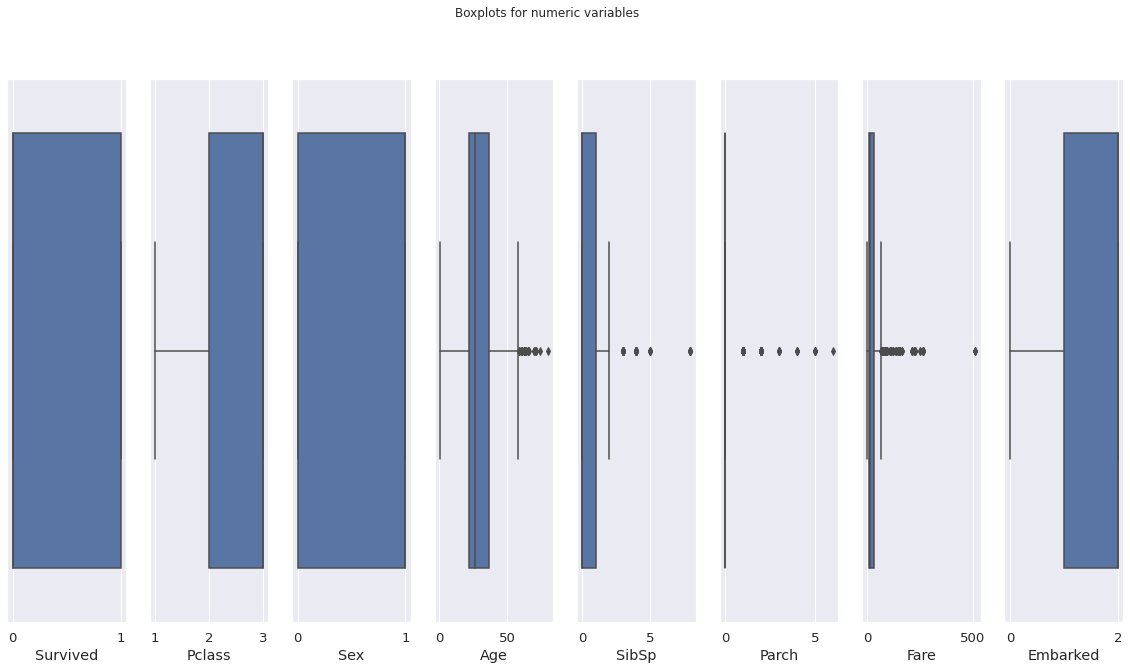

In [35]:
#Checking for outliers
#Plotting boxplots to visualize outliers in the dataset
fig, ((ax1, ax2, ax3,ax4,ax5,ax6,ax7,ax8)) = plt.subplots(1,8, figsize=(20, 10))
fig.suptitle('Boxplots for numeric variables')
sns.boxplot(train2['Survived'], ax=ax1)
sns.boxplot(train2['Pclass'], ax=ax2)
sns.boxplot(train2['Sex'], ax=ax3)
sns.boxplot(train2['Age'], ax=ax4)
sns.boxplot(train2['SibSp'], ax=ax5)
sns.boxplot(train2['Parch'], ax=ax6)
sns.boxplot(train2['Fare'], ax=ax7)
sns.boxplot(train2['Embarked'], ax=ax8)
plt.show()

The categorical columns do not have outliers, however there are outliers on the numerical columns i.e. age, SibSp, Parch and the Fare. 

We will not remove these outliers as they are necessary, they present the information of the passengers hence removng them would results in removing actual information about passengers.

## 6. Exploratory Analysis

### a.) Statistical Descriptions

In [36]:
#Checking statistical descriptions of the dataset
train2.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,0.649044,29.019314,0.524184,0.382452,32.096681,1.535433
std,0.486260,0.834700,0.477538,13.209814,1.103705,0.806761,49.697504,0.792088
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.895800,1.000000
50%,0.000000,3.000000,1.000000,26.000000,0.000000,0.000000,14.454200,2.000000
75%,1.000000,3.000000,1.000000,36.500000,1.000000,0.000000,31.000000,2.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


The above simply gives the measures of central tendency i.e. the mean, median, 25th percentile, 75th percentile, the minimum and maximum of the different variables in the dataset.

It also gives some measures of dispersion i.e standard deviation of the variables.

### b.) Distribution plots

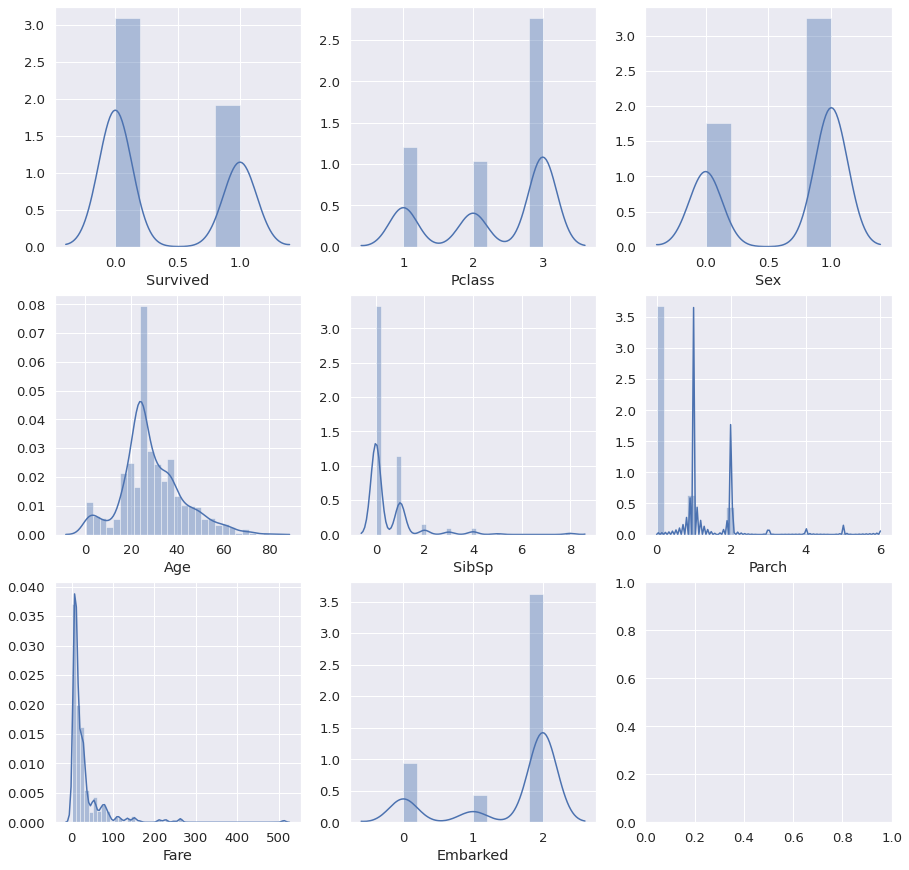

In [37]:
#Plotting distribution plots for the variables to see the type of distribution they possess
f, axes = plt.subplots(3, 3, figsize=(15, 15), sharex=False)
sns.distplot( train2['Survived'],ax=axes[0, 0])
sns.distplot( train2['Pclass'],ax=axes[0, 1])
sns.distplot( train2['Sex'],ax=axes[0, 2])
sns.distplot( train2['Age'],ax=axes[1, 0])
sns.distplot( train2['SibSp'],ax=axes[1, 1])
sns.distplot( train2['Parch'],ax=axes[1, 2])
sns.distplot( train2['Fare'],ax=axes[2, 0])
sns.distplot( train2['Embarked'],ax=axes[2, 1])

From the above we can see the distribution of each variable and they are listed as folows;
* Survived - The number of passengers who survived is higher than those who did not survive.
* Pclass - Most of the passengers were in 3rd class followed by 1st class then 2nd class had the least number of passengers.
* Sex - THere were more males than female passengers on booard the titanic.
* Age - Most of the passengers were aged between 20 and 40 with the majority being itheir late 20s
* SibSp - The majority number of siblings/spouses aboard was 0 therefore not many passengers had siblings /spouses on board.
* Parch - The majority number of parents/children aboard was also 0 implying not many passengers had parents and children on board.
* Fare - The majority of the fare paid by the passengers in British Pounds was between 0 and 100 with very few passengers paying more than 100.
* Embarked - The Southampton Port was the port where many passengers embarked followed by Cherbourg port and lastly the Queenstown port.  

### c.) Histograms

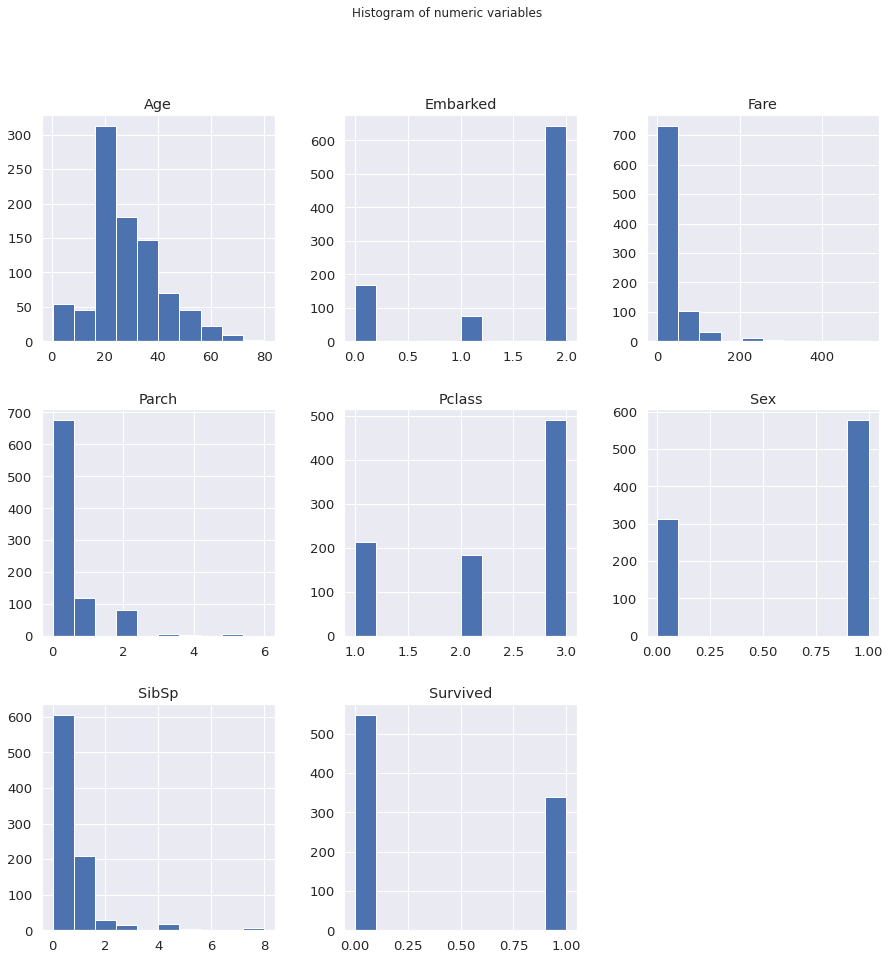

In [38]:
#Plotting the variables on histograms to view the distribution of each variable.
train2.hist(bins=10, figsize=(15,15))
plt.suptitle("Histogram of numeric variables")
plt.savefig('Titanic Histogram')
plt.show()

The above chart shows that the distribution is right-skewed for some of the variables and some are skewed to the left. Generally our data is very skewed.
However the age variable has a normal distribution

### d.) Correlation

In [39]:
#Checking how our varibales are correlated using a matrix
corrMatrix = train2.corr()
corrMatrix

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.335549,-0.541585,-0.052051,-0.034040,0.083151,0.255290,-0.169718
Pclass,-0.335549,1.000000,0.127741,-0.405549,0.081656,0.016824,-0.548193,0.164681
Sex,-0.541585,0.127741,1.000000,0.083730,-0.116348,-0.247508,-0.179958,0.110320
Age,-0.052051,-0.405549,0.083730,1.000000,-0.242807,-0.170089,0.120938,-0.013385
SibSp,-0.034040,0.081656,-0.116348,-0.242807,1.000000,0.414542,0.160887,0.068900
Parch,0.083151,0.016824,-0.247508,-0.170089,0.414542,1.000000,0.217532,0.040449
Fare,0.255290,-0.548193,-0.179958,0.120938,0.160887,0.217532,1.000000,-0.226311
Embarked,-0.169718,0.164681,0.110320,-0.013385,0.068900,0.040449,-0.226311,1.000000


We can see that our variables are correlated with the gender of our passenger having the highest correlation to the survival variable.

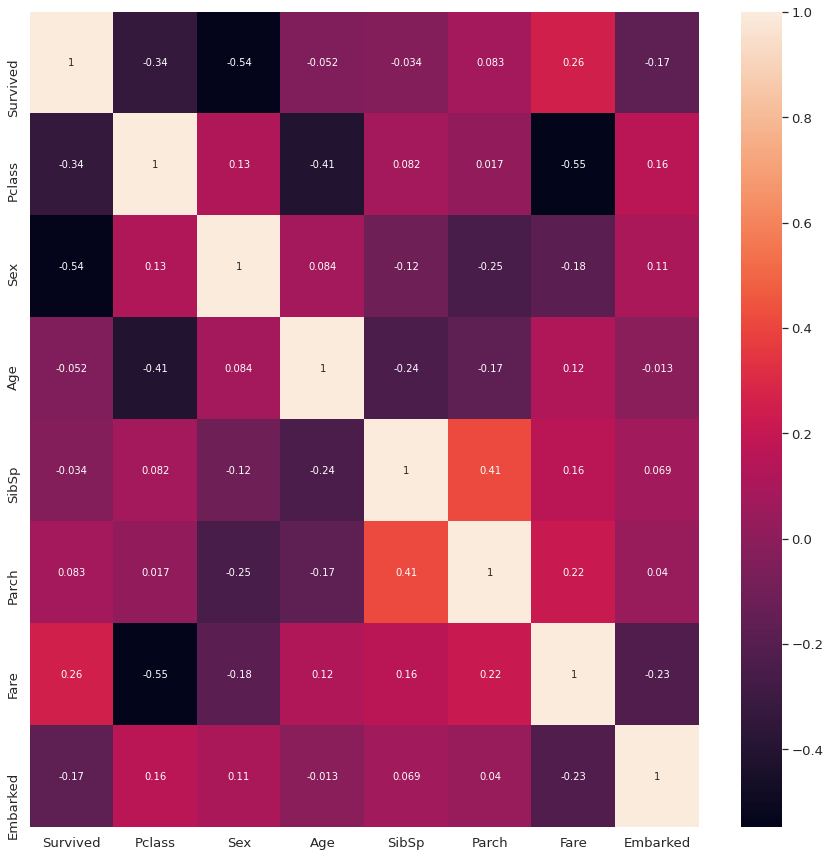

In [40]:
#Plotting visualization of the correlation matrix for better clarity 
plt.figure(figsize=(15, 15))  
sns.heatmap(corrMatrix, annot = True)

The above heatmap shows a vivid description of the correlation of our variables and as you can see the sex variable is highly correlated to the survival of the passenger.

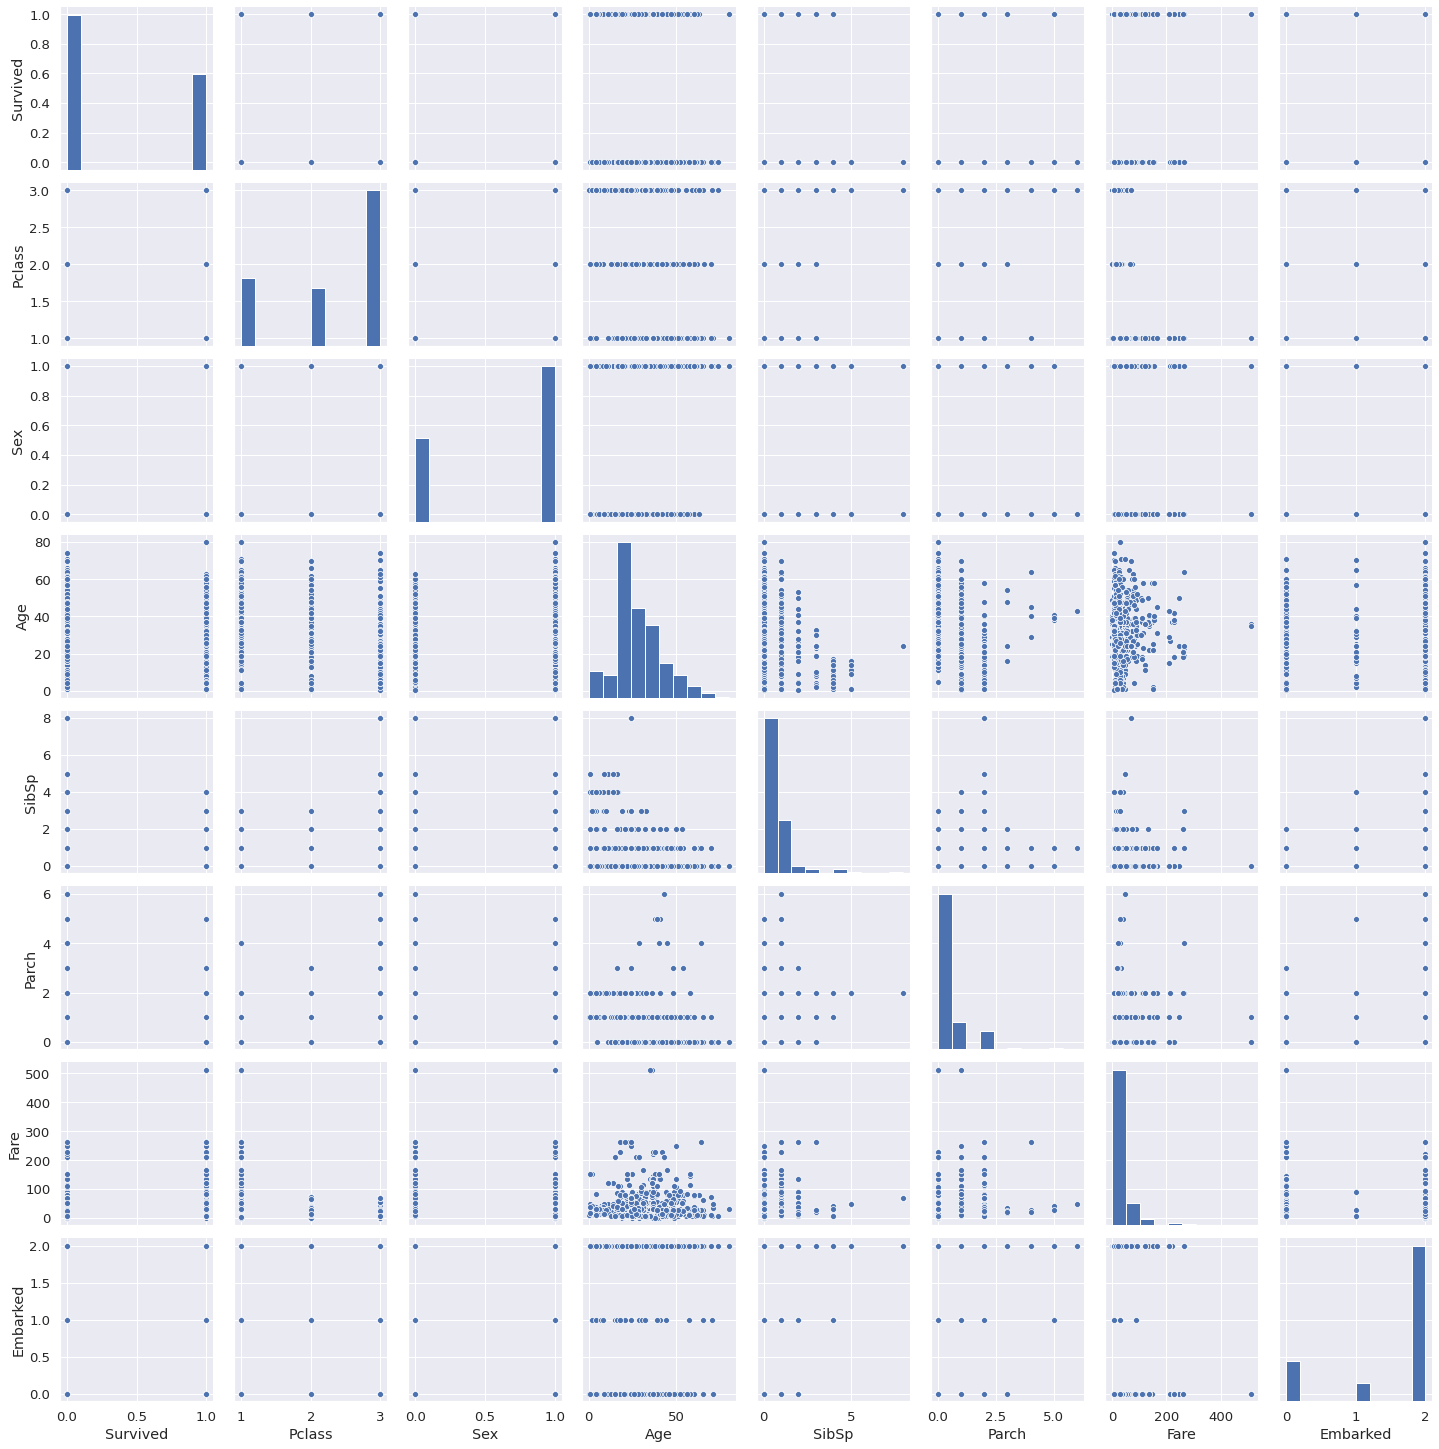

In [41]:
#Plotting pairplots to see the relationships in our dataset.
#Plotting pair plots
sns.pairplot(train2)
plt.show()

### e.) Barplots

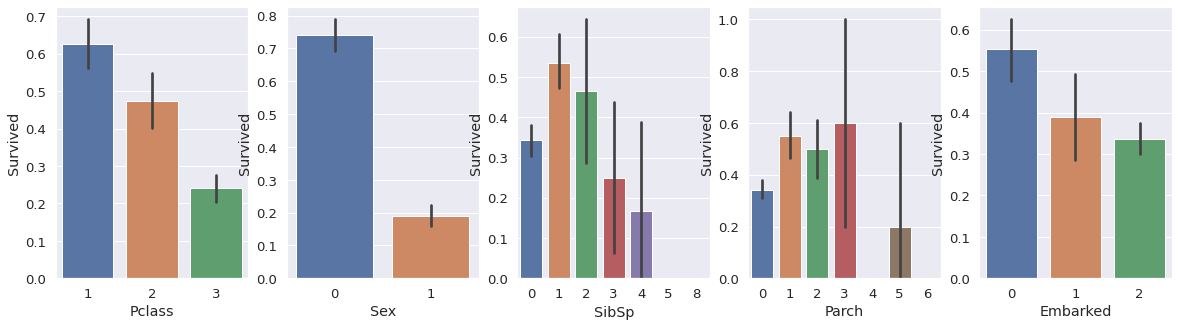

In [42]:
#Plotting barplots to show how the passenger class, sex, number of siblings/spouse, parents/ children and the port they embarked on
# to show how they affect the survival of a passenger
fig, ax = plt.subplots(1,5, figsize=(20, 5))
sns.barplot(x= 'Pclass', y = 'Survived', data = train2, ax=ax[0])
sns.barplot(x= 'Sex', y = 'Survived', data = train2, ax=ax[1])
sns.barplot(x= 'SibSp', y = 'Survived', data = train2, ax=ax[2])
sns.barplot(x= 'Parch', y = 'Survived', data = train2, ax=ax[3])
sns.barplot(x= 'Embarked', y = 'Survived', data = train2, ax=ax[4])
fig.show()

From the above we can deduce the following;
* Most of the people who survived were in 1st class followed by 2nd then 3rd class.
* The females survived morethan the males.
* The passengers with 1 sibling/spouse survived the most followed by 2, 0, 3 then those with 4.
* The passengers with 3 parents/children survived the most followed by 1, 2,0 then 5.
* The passengers who embarked at Port Cherboug survived more than th other ports. 

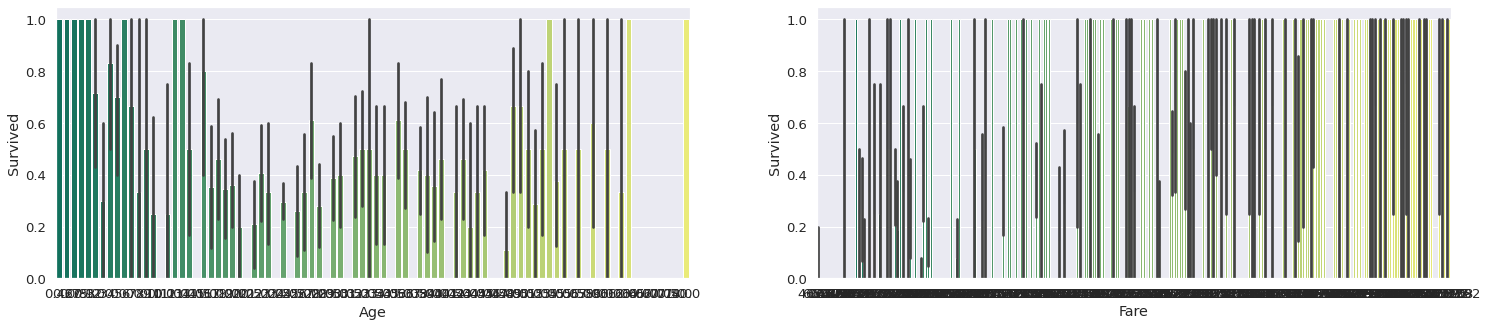

In [43]:
#Plotting barplots to show how the age and the fare of the passengers affect their survival
fig, ax = plt.subplots(1,2, figsize=(25, 5))
sns.barplot(x= 'Age', y = 'Survived', data = train2, palette='summer', ax=ax[0])
sns.barplot(x= 'Fare', y = 'Survived', data = train2, palette='summer', ax=ax[1])
fig.show()

Although the above barplots are very clustered and very hard to interpret. The age barplot is not so clustered, we can deduce some conclusions from it.

Young passengers survived more than other passengers. The chance of survival for middle aged passengers was the lowest. 

The fare bar plot is very clustered and we therefore cannot draw genuine conclusions from it.

## 7. Implementing the Solution

We'll use the KNN classifier while building our models. We'll train using the train dataset then fit our model the test dataset to see how well our model performs on unseen data.

### a.) Baseline Model

We'll build a baseline model which will be a benchmark for our other models and we'll use it's accuracy score to determine if our models perform better or not.

In [49]:
#Splitting the independent and dependent variables
test_features = train2.columns.to_list()
test_features.remove('Survived')

X = train2[test_features].values
y = train2['Survived'].values

In [50]:
#Training using 80% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=6) 

In [55]:
#Training our model by fitting the train test with KNN classifier
 
#We'll set the value of K at 5 at first.
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [52]:
#Predicting our test predictors
predicted = classifier.predict(X_test)

In [53]:
#Evaluating our model using the accuracy score
accuracy_score(y_test, predicted)

0.7134831460674157

Our baseline model does not perform badly and has an accuracy of 71.34% although it performs lower than our metric of success which indicited that a model will be considered a good model if it has an accuracy higher than 80%

This score will be a benchmark for the models we build.

In [54]:
#Evaluating the model using a confusion matrix.
confusion_matrix(y_test, predicted)

array([[86, 18],
       [33, 41]])

According to the confusion matrix, our model has 18 false positives and 33 false negatives. This shows a low number of false positives and a lot of false negative indicating that our baseline model has high precision but low recall.

### b.) Building the Model

We'll build a better model by scaling our data so that all of them can be uniformly evaluated.

In [79]:
#Splitting the independent and dependent variables
test_features = train2.columns.to_list()
test_features.remove('Survived')

X = train2[test_features].values
y = train2['Survived'].values

In [57]:
#Training using 80% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=6) 

In [59]:
#Feature Scaling
#Before making any actual predictions, we'll scale the features so that all of them can be uniformly evaluated.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [60]:
#Training our model by fitting the train test with KNN classifier
 
#We'll set the value of K at 5 at first.
classifier = KNeighborsClassifier(n_neighbors= 5)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [61]:
#Predicting our test predictors
predicted = classifier.predict(X_test)

In [62]:
#Evaluating our model using the accuracy score
accuracy_score(y_test, predicted)

0.8089887640449438

The accuracy of our model is 80.89%; higher than that of the baseline model. This means that scaling our data did a good job.

We'll further perform feature selection to select the best features and see if we get a better model.

In [65]:
#Evaluating the model using a confusion matrix.
confusion_matrix(y_test, predicted)

array([[92, 12],
       [22, 52]])

According to the confusion matrix, our model has 12 false positives and 22 false negatives. This shows a low number of false positives and a lot of false negative indicating that our baseline model has high precision but low recall.

Our model did a better job compared to the baseline model.

### c.) Feature Selection

We'll perform feature selection using selectKBest.
Feature selection is a technique where we choose those features in our data that contribute most to the target variable. In other words we choose the best predictors for the target variable.

The classes in the sklearn.feature_selection module can be used for feature selection/dimensionality reduction on sample sets, either to improve estimators’ accuracy scores or to boost their performance on very high-dimensional datasets.

In [67]:
#Import SelectKBest, chi2(score function for classification)
from sklearn.feature_selection import SelectKBest, chi2
#Splitting the independent and dependent variables
test_features = train2.columns.to_list()
test_features.remove('Survived')

X = train2[test_features]
y = train2['Survived']
#Create the object for SelectKBest and fit and transform the classification data
#k is the number of features we want to select, here it's 4
X_new=SelectKBest(score_func=chi2,k=4).fit_transform(X,y)
#Check the newly created variable for top two best features
print(X_new[:5])

[[ 3.      1.     22.      7.25  ]
 [ 1.      0.     38.     71.2833]
 [ 3.      0.     26.      7.925 ]
 [ 1.      0.     35.     53.1   ]
 [ 3.      1.     35.      8.05  ]]


In [68]:
#Compare the newly created values with feature set values to know the selected features
print(X.head())

   Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0       3    1  22.0      1      0   7.2500         2
1       1    0  38.0      1      0  71.2833         0
2       3    0  26.0      0      0   7.9250         2
3       1    0  35.0      1      0  53.1000         2
4       3    1  35.0      0      0   8.0500         2


The 4 best features selected are Passenger Class, Sex, Age and the Fare of the passengers. We'll use these features to create our model and see if it improves the accuracy score.

### d.) 80-20 Split

We'll now build a model with the selected features to see if we get a model with a better accuarcy score.
We'll start by using the 80-20 split.

In [85]:
#Splitting the independent and dependent variables
test_features = train2.columns.to_list()
test_features.remove('Survived')

X = train2[['Pclass','Sex','Age','Fare']].values
y = train2['Survived'].values

In [86]:
#Training using 80% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=6) 

In [87]:
#Feature Scaling
#Before making any actual predictions, we'll scale the features so that all of them can be uniformly evaluated.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [88]:
#Training our model by fitting the train test with KNN classifier
 
#We'll set the value of K at 5
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [89]:
#Predicting our test predictors
predicted = classifier.predict(X_test)

In [90]:
#Evaluating our model using the accuracy score
accuracy_score(y_test, predicted)

0.848314606741573

As we can see, the accuracy of our model increases to 84.83% which is way better than the 2 other models.

In [91]:
#Evaluating the model using a confusion matrix.
confusion_matrix(y_test, predicted)

array([[94, 10],
       [17, 57]])

According to the confusion matrix, our model has 17 false positives and 10 false negatives. This shows a low number of false positives and a lot of false negative and a high number of true positives and true negatives hence our model did not do badly.

### e.) 70-30 Split

In [92]:
#Training using 70% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=6) 

In [94]:
#Feature Scaling
#Before making any actual predictions, we'll scale the features so that all of them can be uniformly evaluated.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [95]:
#Training our model by fitting the train test with KNN classifier
 
#We'll set the value of K at 5
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [96]:
#Predicting our test predictors
predicted = classifier.predict(X_test)

In [653]:
#Evaluating our model using the accuracy score
accuracy_score(y_test, predicted)

0.8314606741573034

The 70-30 Split gives us an accuracy score of 83.14% which is lower than other 80-20 model.  

###  f.) 60-40 Split

In [97]:
#Training using 60% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=6) 

In [98]:
#Feature Scaling
#Before making any actual predictions, we'll scale the features so that all of them can be uniformly evaluated.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [99]:
#Training our model by fitting the train test with KNN classifier
 
#We'll set the value of K at 5
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [100]:
#Predicting our test predictors
predicted = classifier.predict(X_test)

In [101]:
#Evaluating our model using the accuracy score
accuracy_score(y_test, predicted)

0.797752808988764

This split also gives us a very low accuracy score of 79.77%, lower than all the models even the baseline model. This is not such a good model according to our metric of success where for a model to be considered a good model we should get an accuracy of more than 80%

We can therefore conclude that our models get worse when we further split the training set.

### g.) Model Optimization

We'll optimize the best model i.e. the 80-20 model by changing the distance metric to see if we can improve it's accuracy score.

In [105]:
#Training using 80% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=6) 

In [106]:
#Feature Scaling
#Before making any actual predictions, we'll scale the features so that all of them can be uniformly evaluated.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [107]:
#Training our model by fitting the train test with KNN classifier
#We'll first use the Minkowski distance
classifier = KNeighborsClassifier(n_neighbors = 5, metric='minkowski')
classifier.fit(X_train, y_train)
#Predicting our test predictors
predicted = classifier.predict(X_test)
#Evaluating our model using the accuracy score
accuracy_score(y_test, predicted)

0.848314606741573

In [108]:
#Training our model by fitting the train test with KNN classifier
#We'll use the Manhattan distance
classifier = KNeighborsClassifier(n_neighbors = 5, metric='manhattan')
classifier.fit(X_train, y_train)
#Predicting our test predictors
predicted = classifier.predict(X_test)
#Evaluating our model using the accuracy score
accuracy_score(y_test, predicted)

0.8370786516853933

In [109]:
#Training our model by fitting the train test with KNN classifier
#We'll use the Euclidian distance
classifier = KNeighborsClassifier(n_neighbors = 5, metric='euclidean')
classifier.fit(X_train, y_train)
#Predicting our test predictors
predicted = classifier.predict(X_test)
#Evaluating our model using the accuracy score
accuracy_score(y_test, predicted)

0.848314606741573

The Minkowski and Euclidean metric distances perform just as good as the 80-20 split without optimization. The Manhattan metric distance however does not perform well hence the other two are the most recommended.

## 8. Challenging the solution

The easy solution is nice because it is, well, easy, but you should never allow those results to hold the day.

We'll challenge our KNN Classifier models by tuning the k parameter, we'll use GridSearch to find the best number of neighbours to set at.
We already know the best features, the 80-20 split and the Manhattan and Euclidean distances perform the best.

We'll then combine the best parameters with the above and see if we can build  a model with a better accuracy score.






In [124]:
from sklearn.model_selection import GridSearchCV
#List Hyperparameters that we want to tune.
n_neighbors = list(range(1,30))
#Convert to dictionary
hyperparameter = dict(n_neighbors=n_neighbors)
#Create new KNN object
knn = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(knn, hyperparameter, cv=10)
#Fit the model
best_model = clf.fit(X_train,y_train)
#Print The value of best Hyperparameters
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best n_neighbors: 4


Tuning our parameter gives us 4 as the best value of k. 

We'll now build two models using k as 4, split 80-20 and the Euclidean and Minkowski distance respectively.

In [129]:
#Splitting the independent and dependent variables
test_features = train2.columns.to_list()
test_features.remove('Survived')

X = train2[['Pclass','Sex','Age','Fare']].values
y = train2['Survived'].values

In [130]:
#Training using 80% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=6) 

In [131]:
#Feature Scaling
#Before making any actual predictions, we'll scale the features so that all of them can be uniformly evaluated.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [132]:
#Training our model by fitting the train test with KNN classifier
#We'll first use the Minkowski distance
classifier = KNeighborsClassifier(n_neighbors = 4, metric='minkowski')
classifier.fit(X_train, y_train)
#Predicting our test predictors
predicted = classifier.predict(X_test)
#Evaluating our model using the accuracy score
accuracy_score(y_test, predicted)

0.8426966292134831

In [135]:
#Training our model by fitting the train test with KNN classifier
#We'll then use the Euclidean distance
classifier = KNeighborsClassifier(n_neighbors = 4, metric='euclidean')
classifier.fit(X_train, y_train)
#Predicting our test predictors
predicted = classifier.predict(X_test)
#Evaluating our model using the accuracy score
accuracy_score(y_test, predicted)

0.8426966292134831

Using k as 4 gives the same accuracy score for both metrics, however these models do not beat the accuracy of the model with k as 5. Hence that model is still the most recommended one.

The only set back of this model is that we could not fit the test data set given as it kept giving an error when calculating the accuracy of the model after fitting the given test dataset. The number of samples were inconsistent with our train data hence the fitting was possible but comparing the two, train and test in order to get the accuracy score was very hard to perceive.

Therefore, our models are solely built on the given train data and the test data was ignored.

## 10. Follow up questions

### a). Did we have the right data?

Yes, we had the right data.

### b). Do we need other data to answer our question?

No, the data given is enough to answer our question.

### c). Did we have the right question?

Yes, we have the right question.